# Analytics - Product Quality

#### Date: 2024/08

#### SUMMARY:

- This notebook represents the project quality analysis from GitHub of the date exposed right above. 

### TEAM:

##### Semester: 2024/01
##### Professor: Hilmer Neri

##### Members:

- ...


### LIBRARIES

In [66]:
# Deal with data
import pandas as pd
import json
from glob import glob

# Deal with visualization
import matplotlib.pyplot as plt

# Deal with time
import datetime

import os
import git # Import the gitpython library

# Clone a repository
repo_url = 'https://github.com/fga-eps-mds/2024.1-PrintGo-Doc'  # Replace with your repository URL
clone_dir = '/kaggle/working/PrintGO'  # Directory to clone the repository into

if not os.path.exists(clone_dir):
    print(f"Cloning repository from {repo_url} into {clone_dir}...")
    git.Repo.clone_from(repo_url, clone_dir)
    print("Repository cloned successfully.")
else:
    print(f"Directory {clone_dir} already exists. Skipping clone.")

# Set the cloned directory as the working directory
os.chdir(clone_dir)
print(f"Current working directory: {os.getcwd()}")

# List all files in the cloned directory
for dirname, _, filenames in os.walk('.'):  # '.' now points to clone_dir
    for filename in filenames:
        print(os.path.join(dirname, filename))

Directory /kaggle/working/PrintGO already exists. Skipping clone.
Current working directory: /kaggle/working/PrintGO
./.gitignore
./README.md
./mkdocs.yml
./requirements.txt
./.git/HEAD
./.git/packed-refs
./.git/config
./.git/description
./.git/index
./.git/info/exclude
./.git/logs/HEAD
./.git/logs/refs/remotes/origin/HEAD
./.git/logs/refs/heads/main
./.git/hooks/pre-applypatch.sample
./.git/hooks/pre-merge-commit.sample
./.git/hooks/prepare-commit-msg.sample
./.git/hooks/fsmonitor-watchman.sample
./.git/hooks/post-update.sample
./.git/hooks/pre-push.sample
./.git/hooks/commit-msg.sample
./.git/hooks/pre-commit.sample
./.git/hooks/applypatch-msg.sample
./.git/hooks/update.sample
./.git/hooks/pre-receive.sample
./.git/hooks/pre-rebase.sample
./.git/objects/pack/pack-36fc6d22b097623638120cda9f51e0ce45b42b8e.idx
./.git/objects/pack/pack-36fc6d22b097623638120cda9f51e0ce45b42b8e.pack
./.git/refs/remotes/origin/HEAD
./.git/refs/heads/main
./docs/index.md
./docs/visaoproduto/VisaoDoProduto.md

## Github API

A API do GitHub utiliza principalmente o protocolo HTTP, onde as operações são realizadas através de URLs e métodos HTTP, como GET, POST, PUT e DELETE. Os dados são geralmente retornados em formato JSON, tornando-o fácil de processar e interpretar.

In [67]:
import requests

owner = 'fga-eps-mds'
repos = ['2024.1-PrintGo-PrinterService', '2024.1-PrintGo-ContractService', '2024.1-PrintGo-FrontEnd', '2024.1-PrintGo-ApiGateway', '2024.1-PrintGo-FrontEnd', '2024.1-PrintGo-UserService']

data = []

for repo in repos:
    url = f'https://api.github.com/repos/{owner}/{repo}/actions/runs'
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data_ = response.json()
        data.extend(data_.get('workflow_runs', []))
    else:
        print(f"Erro ao acessar a API do GitHub para o repositório {repo}: {response.status_code}")


#### Unmarshall json

In [68]:
def unmarshall(json_path: str) -> dict:
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
    return json_obj

### Cálculo dos dados

- Carrega dados dos arquivo JSON e armazena-os na variável data.
- Processa os dados do JSON para calcular e obter informações relevantes sobre os tempos de feedback de cada execução de workflow, separando-os em listas de feedback_times, authors_feedback_times, e ci_feedback_times.
- Calcula o tempo médio de feedback (ci_feedback_time) considerando todas as execuções de workflow.
- Calcula o tempo médio de feedback de cada autor e armazena essas informações em authors_avg_feedback_times.
- Processa novamente os dados do JSON para contar o número de execuções bem-sucedidas (success_count) e falhas (failure_count) dos workflows.

In [69]:
import pandas as pd
import datetime

# Inicializa a tabela total vazia
tabela_total = pd.DataFrame()

# Processar os dados do JSON e obter as informações relevantes
success_count = 0
failure_count = 0
table_data = []

# Supondo que `data` é uma lista de runs
for run in data:
    # Converte as datas
    updated_at = datetime.datetime.strptime(run["updated_at"], "%Y-%m-%dT%H:%M:%SZ")
    created_at = datetime.datetime.strptime(run["created_at"], "%Y-%m-%dT%H:%M:%SZ")
    feedback_time = (updated_at - created_at).total_seconds()

    # Coleta as informações relevantes
    workflow_id = run["id"]
    conclusion = run["conclusion"]
    author = run["actor"]["login"]

    # Adiciona os dados na tabela
    table_data.append({
        "Workflow_run ID": workflow_id,
        "Conclusion": conclusion,
        "Author": author,
        "Created at": created_at,
        "Updated at": updated_at,
        "Feedback Time": feedback_time
    })

# Cria o dataframe a partir dos dados coletados
df = pd.DataFrame(table_data)

# Processa os dados para calcular o CI Feedback Time
feedback_times = df["Feedback Time"].tolist()

# Evita divisão por zero
if feedback_times:
    ci_feedback_time = sum(feedback_times) / len(feedback_times)
    df["CI Feedback Time"] = ci_feedback_time
else:
    df["CI Feedback Time"] = 0

# Concatena os dados com a tabela total
tabela_total = pd.concat([tabela_total, df])

# Contabiliza os resultados de sucesso e falha
for conclusion in df["Conclusion"]:
    if conclusion == "success":
        success_count += 1
    elif conclusion == "failure":
        failure_count += 1

# Exibe o resultado final
print('Tabela com todas as linhas')
display(tabela_total)


Tabela com todas as linhas


,Workflow_run ID,Conclusion,Author,Created at,Updated at,Feedback Time,CI Feedback Time
0,10512212807,success,eliseukadesh67,2024-08-22 16:45:25,2024-08-22 16:45:40,15.0,412.875
1,10512212806,skipped,eliseukadesh67,2024-08-22 16:45:25,2024-08-22 16:45:27,2.0,412.875
2,10512212804,success,eliseukadesh67,2024-08-22 16:45:25,2024-08-22 16:47:29,124.0,412.875
3,10512212620,success,eliseukadesh67,2024-08-22 16:45:23,2024-08-22 16:46:28,65.0,412.875
4,10495486684,success,caiolamego,2024-08-21 18:33:46,2024-08-21 18:35:47,121.0,412.875
...,...,...,...,...,...,...,...
155,10001160422,failure,DanielViniciusAlves,2024-07-19 01:42:50,2024-07-19 01:44:28,98.0,412.875
156,10000520990,failure,DanielViniciusAlves,2024-07-19 00:29:13,2024-07-19 01:08:43,2370.0,412.875
157,10000478280,cancelled,DanielViniciusAlves,2024-07-19 00:24:27,2024-07-19 00:28:48,261.0,412.875
158,9913963254,skipped,DanielViniciusAlves,2024-07-12 20:49:01,2024-07-12 20:49:03,2.0,412.875


# Gerar gráficos

- Gráfico de linhas: Mostra o "CI FeedBack Time" (tempo de feedback do CI) em relação à "Data de Atualização" das execuções de workflow.
- Gráfico de barras simples: Exibe o "Tempo Médio de Feedback do CI", representando o desempenho médio geral do CI.
- Gráfico de pizza: Mostra a "Quantidade de Workflows com Sucesso e Falha" em relação ao total de workflows executados, indicando a proporção de workflows que tiveram sucesso e falha.

            Created at  CI Feedback Time
0  2024-07-12 20:48:46           412.875
1  2024-07-12 20:49:01           412.875
2  2024-07-19 00:24:27           412.875
3  2024-07-19 00:29:13           412.875
4  2024-07-19 01:42:50           412.875
..                 ...               ...
88 2024-08-22 16:45:25           412.875
89 2024-08-22 16:45:42           412.875
90 2024-08-22 16:45:45           412.875
91 2024-08-22 17:11:34           412.875
92 2024-08-22 17:17:02           412.875

[93 rows x 2 columns]


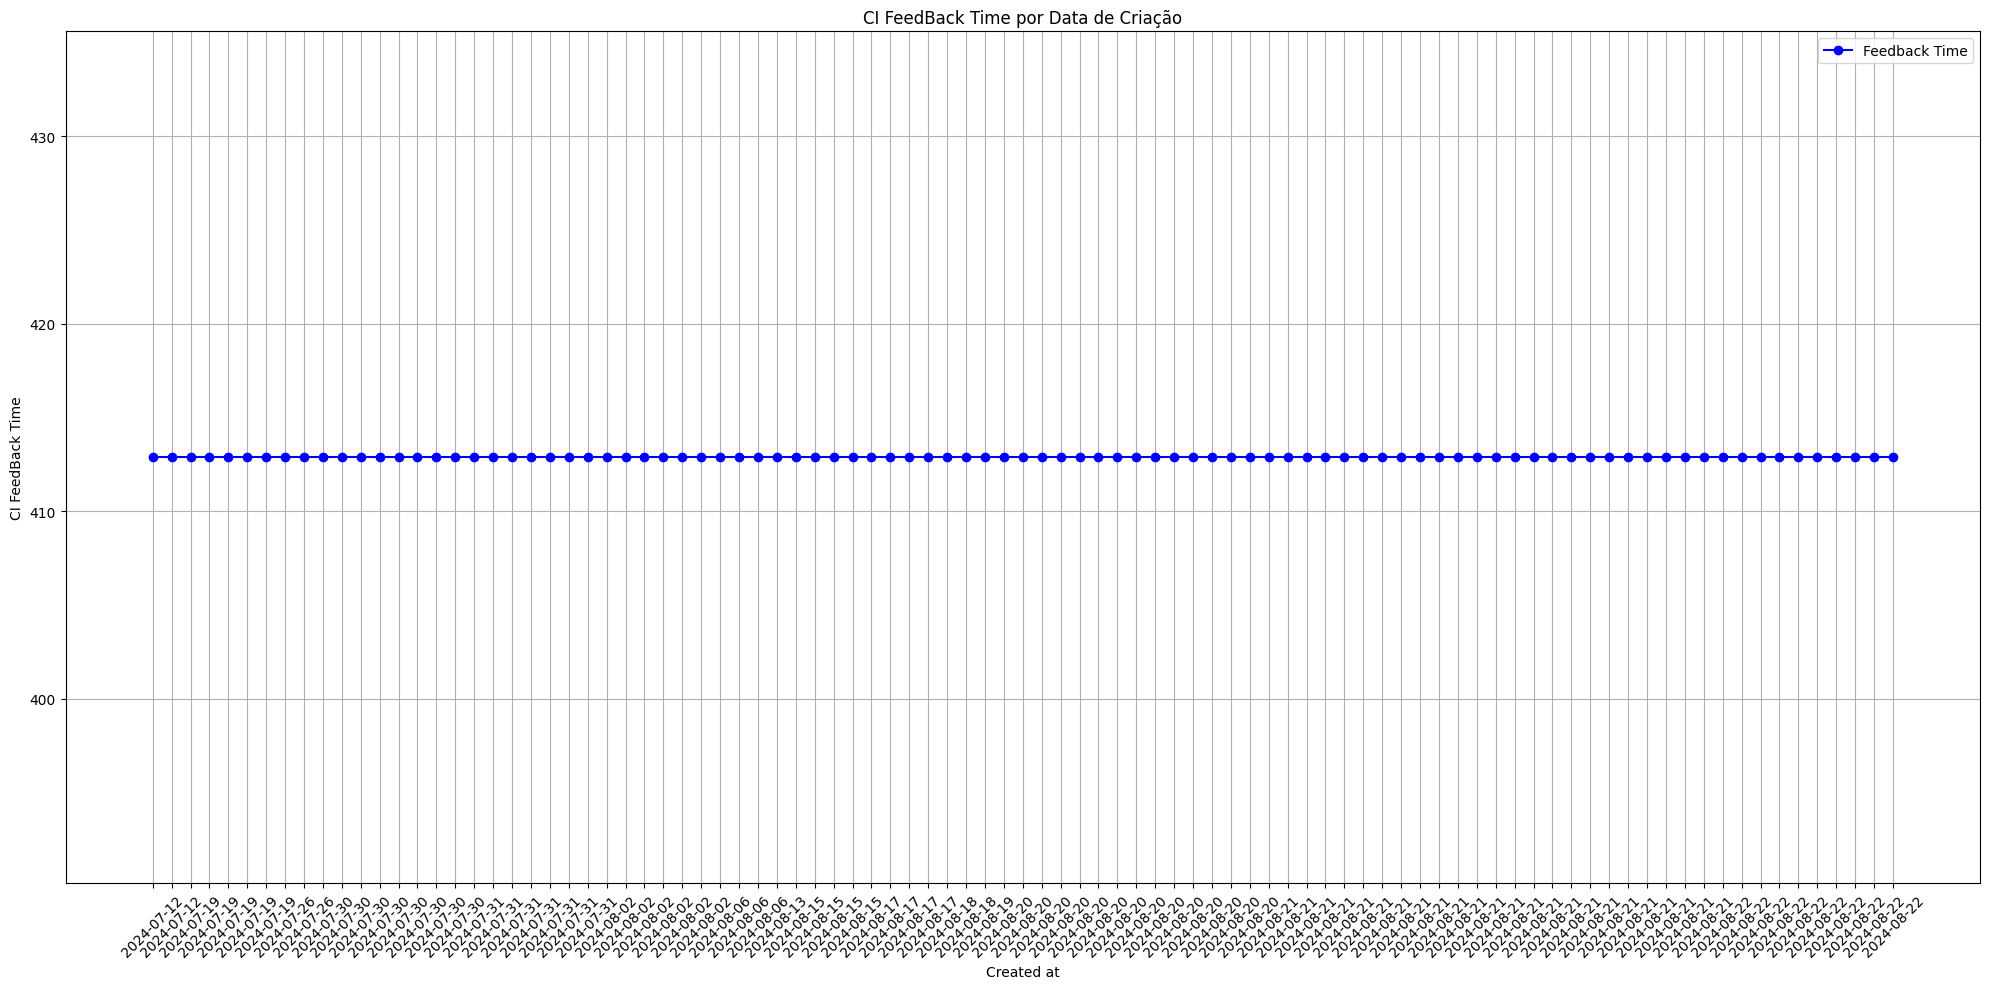

In [70]:
# Gerar gráfico com o CI FeedBack Time por data de atualização

temp = tabela_total[['Created at', 'CI Feedback Time']]
dates = temp.groupby(['Created at']).mean().reset_index()  # Calcula a média dos valores por data
dates['Created at'] = pd.to_datetime(dates['Created at']) 
print(dates)


# dates = [datetime.datetime.strptime(run["updated_at"], "%Y-%m-%dT%H:%M:%SZ") for run in data["workflow_runs"]]
plt.figure(figsize=(20, 10))
plt.plot(range(len(dates)), dates['CI Feedback Time'], marker='o', color='b', label='Feedback Time')
plt.xlabel("Created at")
plt.ylabel("CI FeedBack Time")
plt.title("CI FeedBack Time por Data de Criação")
plt.xticks(range(len(dates)), dates['Created at'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()  # Ajusta a disposição dos elementos para evitar sobreposições
plt.show()

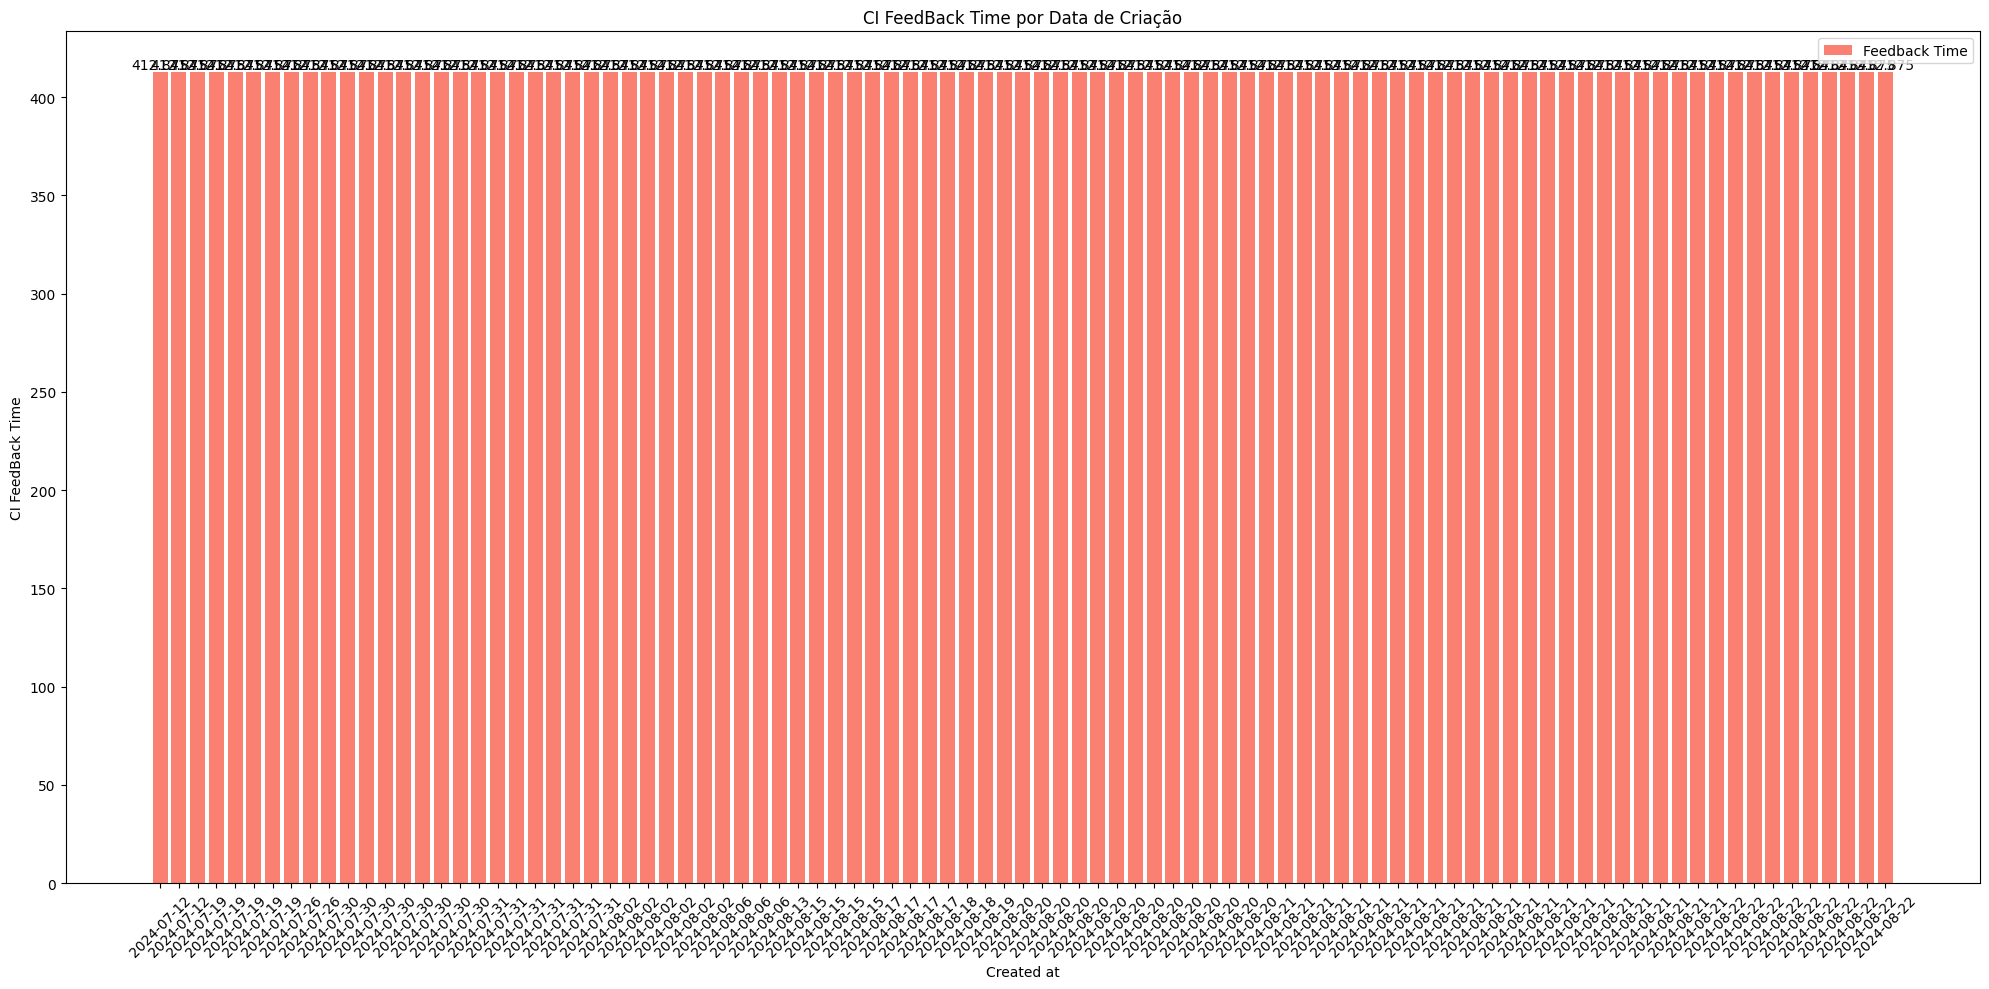

In [71]:
plt.figure(figsize=(20, 10))
bars =  plt.bar(range(len(dates)), dates['CI Feedback Time'], color='salmon', label='Feedback Time')
plt.xlabel("Created at")
plt.ylabel("CI FeedBack Time")
plt.title("CI FeedBack Time por Data de Criação")
plt.xticks(range(len(dates)), dates['Created at'].dt.strftime('%Y-%m-%d'), rotation=45)  # Exibe as datas formatadas no eixo X
plt.legend()
# Adiciona as labels em cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.tight_layout()  # Ajusta a disposição dos elementos para evitar sobreposições
plt.show()

# # Gerar gráfico com o tempo médio do CI
# plt.figure(figsize=(20, 10))
# plt.bar(["CI"], [ci_feedback_time], color='salmon')
# plt.xlabel("CI")
# plt.ylabel("Tempo Médio de Feedback")
# plt.title("Tempo Médio de Feedback do CI")
# plt.text(0, ci_feedback_time, f'{round(ci_feedback_time, 2)} segundos', ha='center', va='bottom', fontweight='bold')
# plt.tight_layout()
# plt.show()

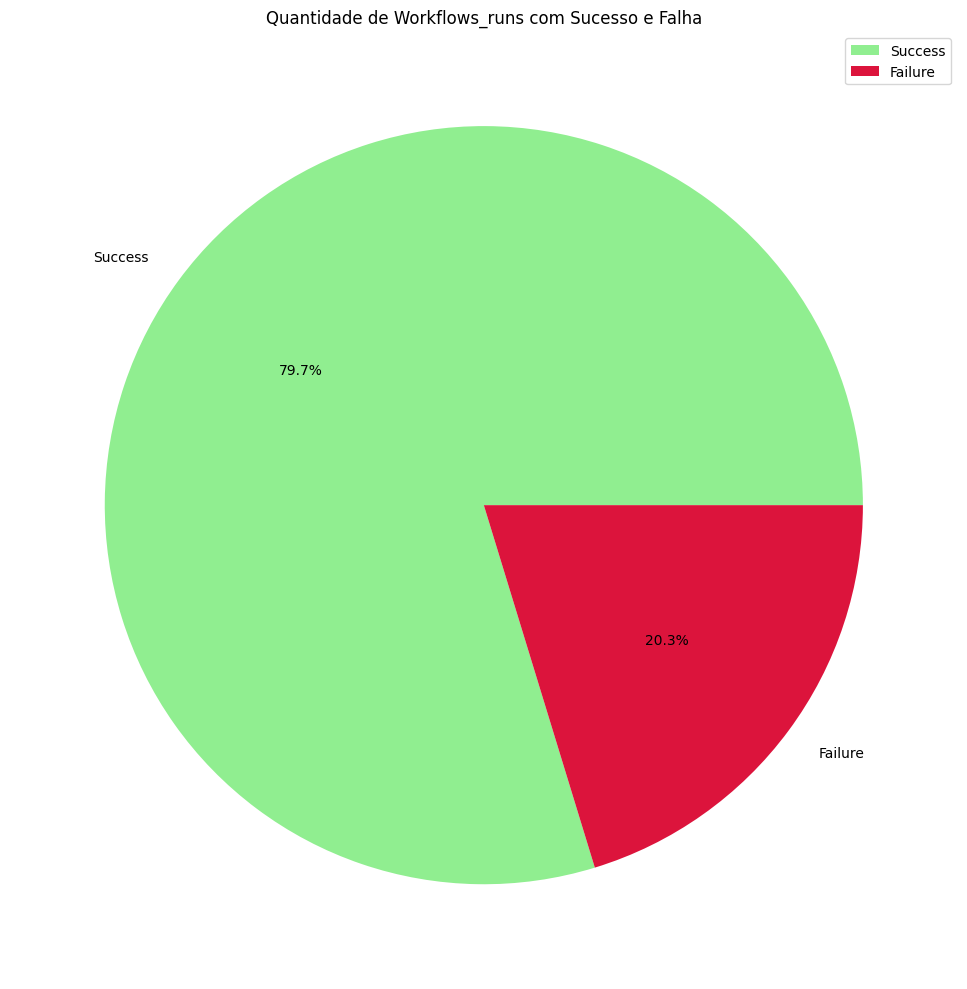

In [72]:
# Gerar gráfico com a quantidade de workflows com sucesso e falha
labels = ["Success", "Failure"]
sizes = [success_count, failure_count]
plt.figure(figsize=(20, 10))
colors = ['lightgreen', 'crimson']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Quantidade de Workflows_runs com Sucesso e Falha")
plt.legend(labels, loc='best')
plt.tight_layout()
plt.show()